## importing Libraries

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Step 1 : Problem Statement

## Step 2: Data Gathering

In [3]:
heart_df = pd.read_csv(r"D:\Jupyter python\New dataset for pratice numpy and pandas\heart.csv")
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Step 3 : EDA(Exploratory Data Analysis)

In [4]:
heart_df.shape

(303, 14)

In [5]:
heart_df["target"].nunique()

2

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_df.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

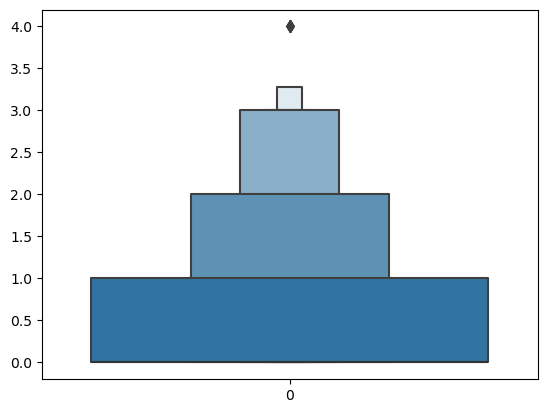

In [8]:
sns.boxenplot(heart_df["ca"])

In [9]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

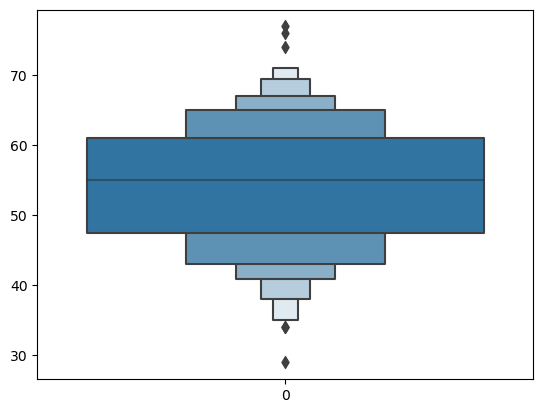

In [10]:
sns.boxenplot(heart_df["age"])

<Axes: >

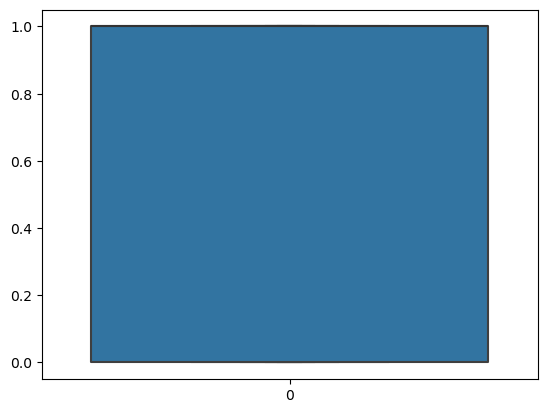

In [11]:
sns.boxenplot(heart_df["sex"])

## Step 4 : Feature Engineering

###  Finding and Replacing outliers with operatile and lower tail

In [12]:
# Finding ouliers by function

Q1 = heart_df.quantile(0.25)
Q3 = heart_df.quantile(0.75) 
IQR = Q3 - Q1

lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR

ouliers = (heart_df < lower_tail) | (heart_df > upper_tail)
ouliers_count = ouliers.sum()
print(ouliers_count)


age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          25
thal         2
target       0
dtype: int64


In [13]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
# To replace outliers
def Finding_outliar1(heart_df,columns):
    for column in columns:
            q1 = heart_df[column].quantile(0.25)
            q3 = heart_df[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            heart_df[column] = heart_df[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = ["trestbps","chol","thalach","oldpeak"]

Finding_outliar1(heart_df,columns)

90.0
170.0
115.75
369.75
84.75
214.75
-2.4000000000000004
4.0


## Scaling 

### Method:- Normalization

In [102]:
noraml = MinMaxScaler() 
noraml_Sc = noraml.fit_transform(heart_df)

df_Normal = pd.DataFrame(noraml_Sc,columns=heart_df.columns)
df_Normal.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.671053,0.438974,1.0,0.0,0.556503,0.0,0.575,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.473684,0.508718,0.0,0.5,0.872068,0.0,0.875,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.473684,0.320000,0.0,0.0,0.744136,0.0,0.350,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.342105,0.451282,0.0,0.5,0.795309,0.0,0.200,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.342105,0.935385,0.0,0.5,0.667377,1.0,0.150,1.0,0.0,0.666667,1.0


## Step 5 : Feature Selection

### Assumption 1.Linearity

In [17]:
heart_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.286134,0.205856,0.121308,-0.116211,-0.398246,0.096801,0.213242,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.047594,-0.180779,0.045032,-0.058196,-0.042937,0.141664,0.105256,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.056267,-0.094081,0.094444,0.044421,0.295748,-0.394280,-0.144957,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.286134,-0.047594,0.056267,1.000000,0.132934,0.168393,-0.116535,-0.053717,0.055354,0.180601,-0.113723,0.102909,0.050339,-0.138621
chol,0.205856,-0.180779,-0.094081,0.132934,1.000000,0.015189,-0.140696,-0.019543,0.083809,0.057323,0.005704,0.077680,0.089103,-0.103987
fbs,0.121308,0.045032,0.094444,0.168393,0.015189,1.000000,-0.084189,-0.009455,0.025665,0.011732,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.116535,-0.140696,-0.084189,1.000000,0.046196,-0.070733,-0.062437,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398246,-0.042937,0.295748,-0.053717,-0.019543,-0.009455,0.046196,1.000000,-0.382586,-0.351496,0.387921,-0.215944,-0.098070,0.422210
exang,0.096801,0.141664,-0.394280,0.055354,0.083809,0.025665,-0.070733,-0.382586,1.000000,0.299565,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.213242,0.105256,-0.144957,0.180601,0.057323,0.011732,-0.062437,-0.351496,0.299565,1.000000,-0.573853,0.218187,0.208407,-0.436680


<Axes: >

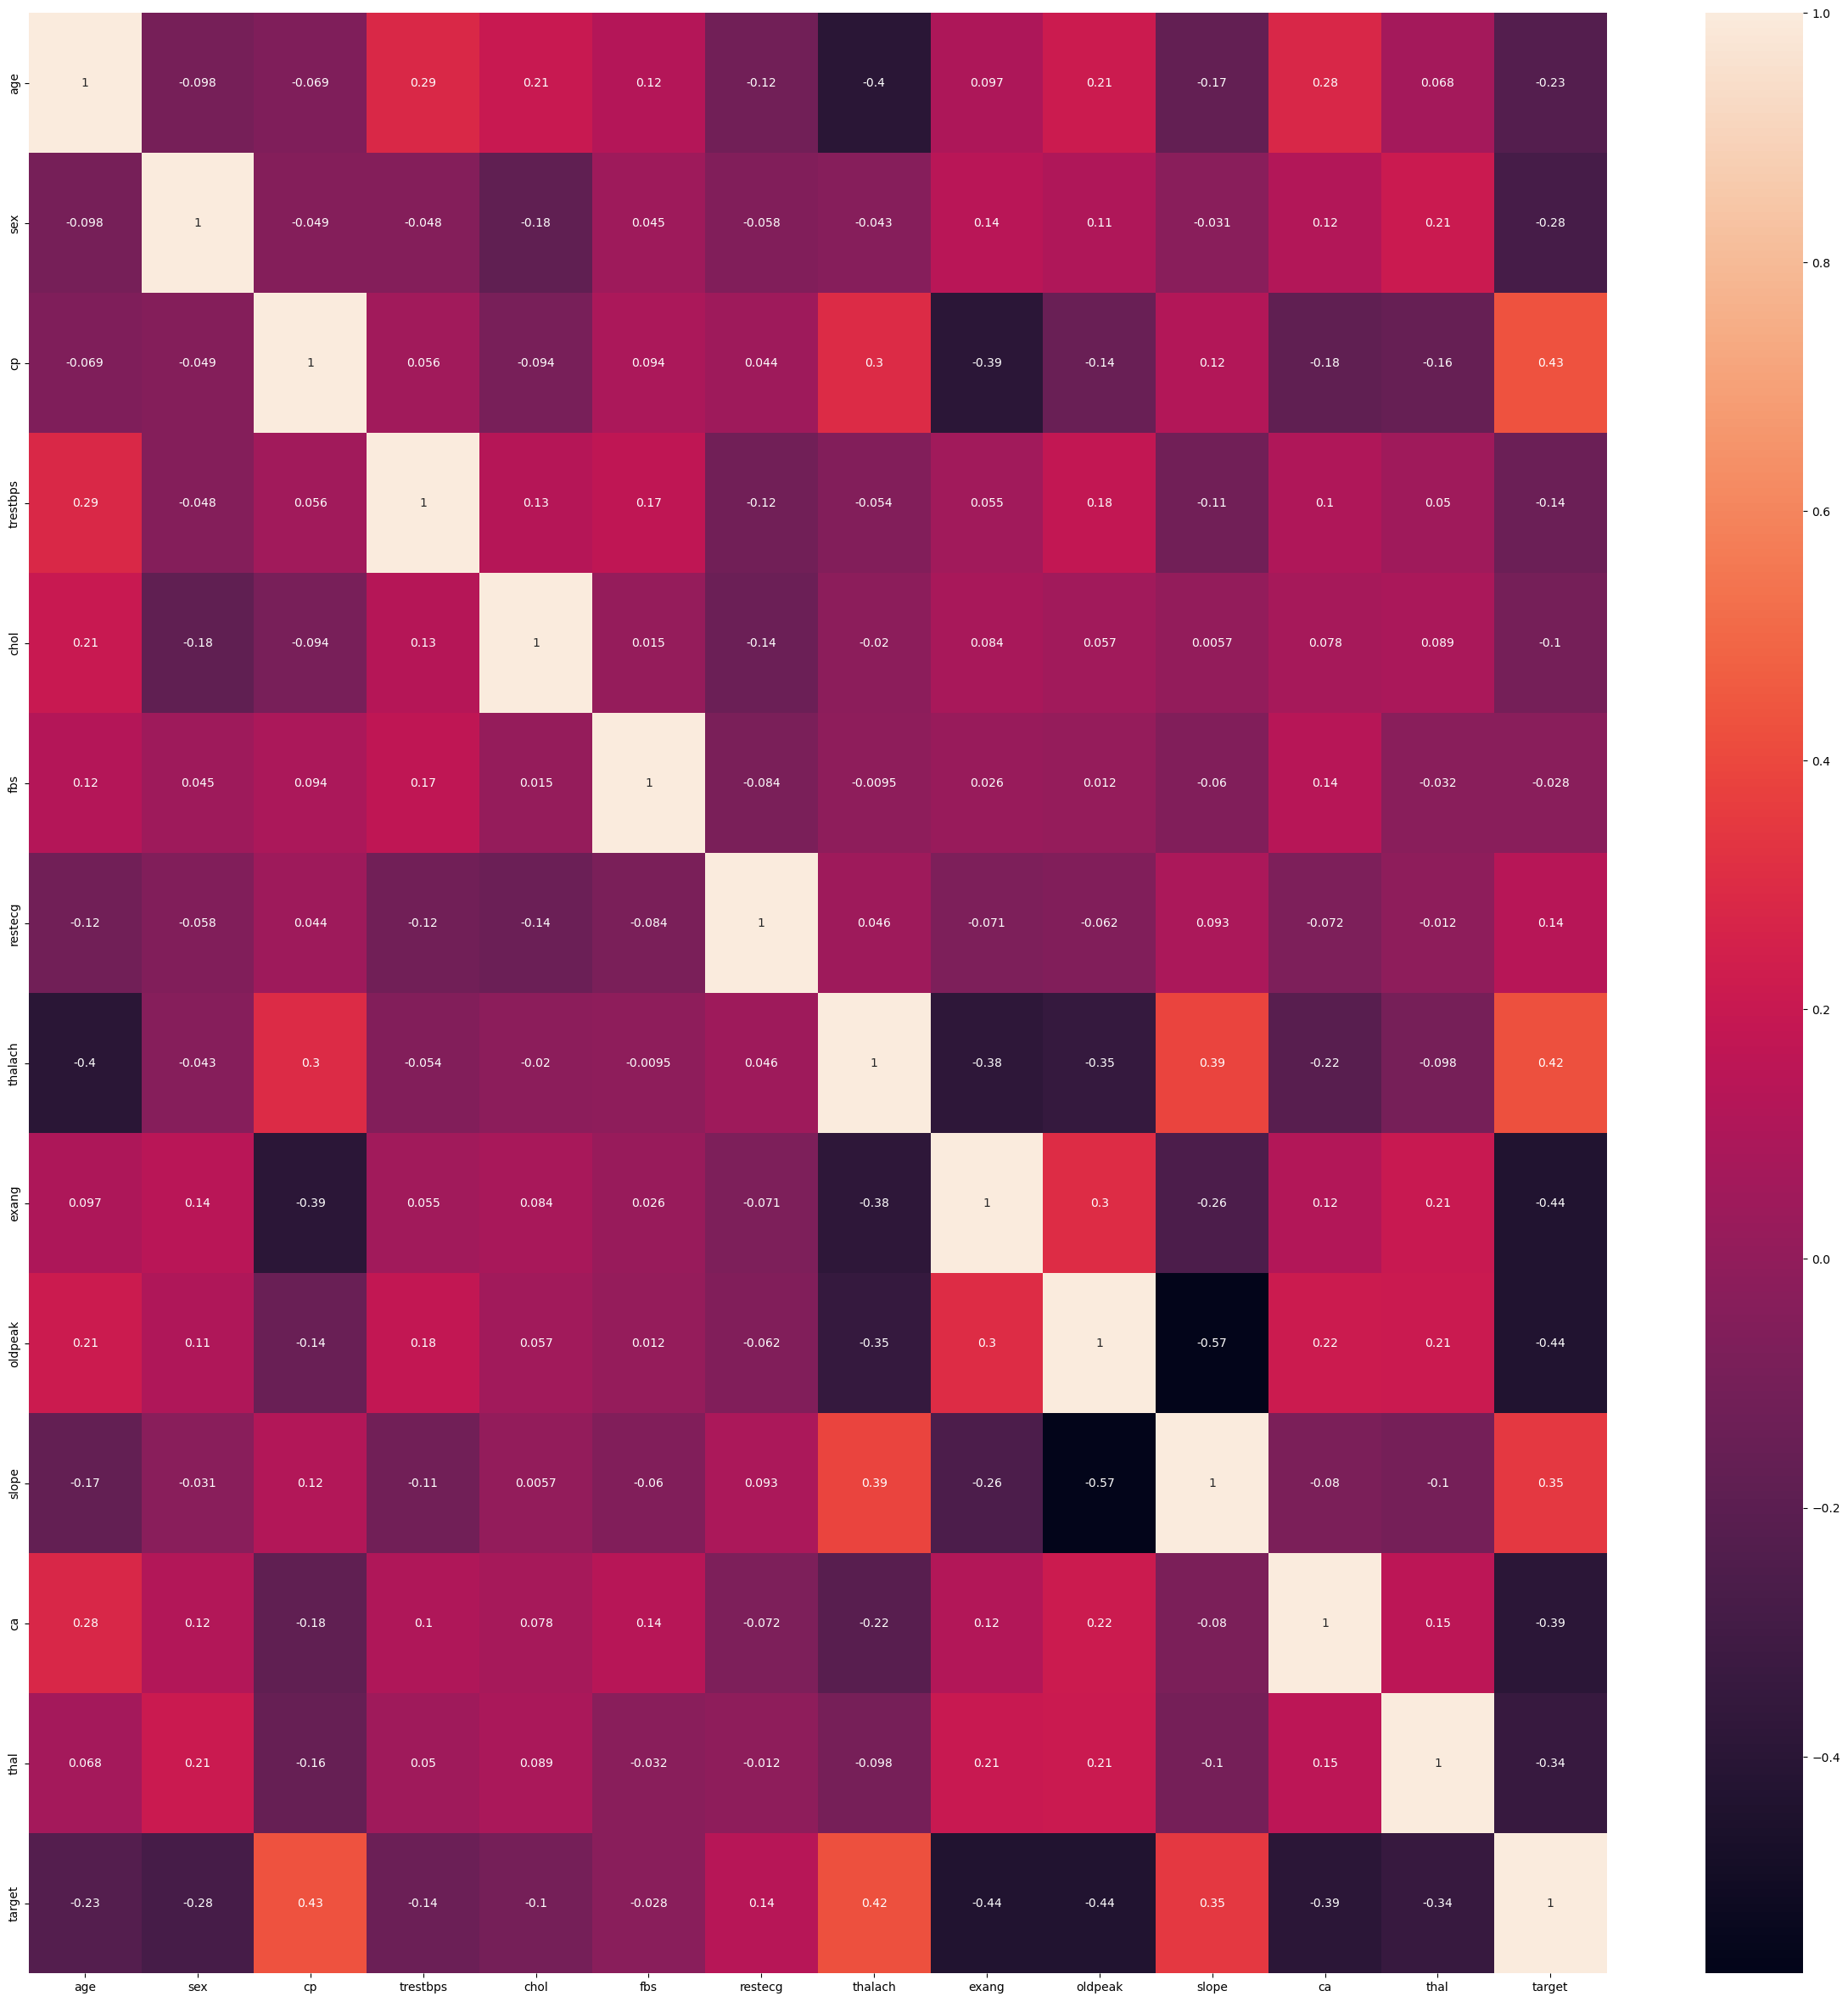

In [18]:
plt.figure(figsize=(30,30))
sns.heatmap(heart_df.corr(),annot=True)


## Assumption 2.No multicolinearity

In [19]:
df1 = heart_df.drop(["target"],axis =1) 
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3
301,57,1,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3


In [20]:
vif = []
for i in range(df1.shape[1]):
    vif_cal = variance_inflation_factor(df1.to_numpy(),i)
    vif.append(vif_cal)
vif

[40.09410146509104,
 3.5063467426879895,
 2.420049793005927,
 63.519609983212064,
 30.154928299586075,
 1.2626622300806085,
 2.0509023018913664,
 43.878467834006365,
 2.037244956979835,
 3.1310400890887062,
 10.002103588793059,
 1.8055020151926544,
 17.050977549504577]

<Axes: xlabel='target', ylabel='count'>

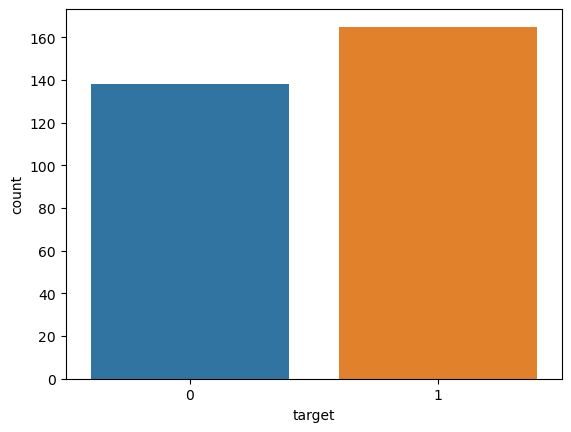

In [21]:
sns.countplot(x=heart_df["target"])

## Train test split

In [103]:
x = df_Normal.iloc[:,:13]
y = df_Normal["target"]
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
298    0.0
299    0.0
300    0.0
301    0.0
302    0.0
Name: target, Length: 303, dtype: float64

In [104]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

## Step 6 : model training 

### 1.Logistic Regression algorithm 

In [105]:
reg = LogisticRegression(multi_class="ovr") #sigmoid curve, best m,c, costfunction
reg_model = reg.fit(xtrain,ytrain)
reg_model

LogisticRegression(multi_class='ovr')

In [106]:
ytrain_pred = reg_model.predict(xtrain)
ytrain_pred

array([1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.

## Step 7 Model Evaluation

## Training

In [107]:

accuracy = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {accuracy}")
print(50*"_")
print(50*"*")

conf_matrix = confusion_matrix(ytrain,ytrain_pred)
print(conf_matrix)
print(50*"_")
print(50*"*")
class_rap_new = classification_report(ytrain,ytrain_pred)
print(class_rap_new)
print(50*"_")
print(50*"*")

Accuracy : 0.8429752066115702
__________________________________________________
**************************************************
[[ 82  28]
 [ 10 122]]
__________________________________________________
**************************************************
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81       110
         1.0       0.81      0.92      0.87       132

    accuracy                           0.84       242
   macro avg       0.85      0.83      0.84       242
weighted avg       0.85      0.84      0.84       242

__________________________________________________
**************************************************


In [108]:
ytest_pred = reg_model.predict(xtest)
ytest_pred

array([1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

## Testing

In [109]:

accuracy = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {accuracy}")
print(50*"_")
print(50*"*")

conf_matrix = confusion_matrix(ytest,ytest_pred)
print(conf_matrix)
print(50*"_")
print(50*"*")

class_rep = classification_report(ytest,ytest_pred)
print (class_rep)
print(50*"_")
print(50*"*")

Accuracy : 0.8032786885245902
__________________________________________________
**************************************************
[[21  7]
 [ 5 28]]
__________________________________________________
**************************************************
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78        28
         1.0       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

__________________________________________________
**************************************************


 ## Model Training Using Ensemble Methods 

### 2.Random Forestalgorithm

In [128]:
Random_tel= RandomForestClassifier()
Random_tel

RandomForestClassifier()

In [129]:
Random_tel_cls = Random_tel.fit(xtrain,ytrain)
Random_tel_cls

RandomForestClassifier()

In [130]:
y1train_pred_forest = Random_tel_cls.predict(xtrain)
y1train_pred_forest

array([1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 1.

### Training

In [131]:
Random_accuracy = accuracy_score(ytrain,y1train_pred_forest)
print(f"Accuracy = {Random_accuracy}")

Random_Training_classification = classification_report(ytrain,y1train_pred_forest)
print(f"classification_report = {Random_Training_classification}")

Random_Training_confusion = confusion_matrix(ytrain,y1train_pred_forest)
print(f"confusion_matrix = {Random_Training_confusion}")

Accuracy = 1.0
classification_report =               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       110
         1.0       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

confusion_matrix = [[110   0]
 [  0 132]]


### Testing

In [132]:
y1test_pred_forest = Random_tel_cls.predict(xtest)

In [133]:
Random_Testing_accuracy = accuracy_score(ytest,y1test_pred_forest)
print(f"Accuracy = {Random_Testing_accuracy}")

Random_Testing_classification = classification_report(ytest,y1test_pred_forest)
print(f"classification_report = {Random_Testing_classification}")

Random_Testing_confusion = confusion_matrix(ytest,y1test_pred_forest)
print(f"confusion_matrix = {Random_Testing_confusion}")

Accuracy = 0.819672131147541
classification_report =               precision    recall  f1-score   support

         0.0       0.77      0.86      0.81        28
         1.0       0.87      0.79      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

confusion_matrix = [[24  4]
 [ 7 26]]


### Random Forest Hyperparameter Tunning

In [134]:
Hyper_Random = {
    "n_estimators": [100],
    "criterion": ['gini', 'entropy'],
    "max_depth":np.array([2,10]), 
    "min_samples_split":np.array([2,10]),
    "min_samples_leaf": np.array([2,10]),
    "max_features" : ["auto"]
     }

In [135]:
Random_model =RandomForestClassifier(random_state=10)

In [136]:
RandomSearch =RandomizedSearchCV(Random_model,Hyper_Random,cv=6)

In [137]:
RandomSearch.fit(xtrain,ytrain)

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2, 10]),
                                        'max_features': ['auto'],
                                        'min_samples_leaf': array([ 2, 10]),
                                        'min_samples_split': array([ 2, 10]),
                                        'n_estimators': [100]})

In [138]:
RandomSearch.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=10)

In [139]:
Forest_hyper_model = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=10)

In [140]:
Forest_hyper_model.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=10)

### Training

In [141]:
y1train_pred_hyper_forest = Forest_hyper_model.predict(xtrain)
y1train_pred_hyper_forest

array([1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.

In [142]:
Training_forest_accuracy = accuracy_score(ytrain,y1train_pred_hyper_forest)
print(f"Accuracy = {Training_forest_accuracy}")

Training_classification_forest_hyper = classification_report(ytrain,y1train_pred_hyper_forest)
print(f"classification_report = {Training_classification_forest_hyper}")

Training_confusion_forest_hyper = confusion_matrix(ytrain,y1train_pred_hyper_forest)
print(f"confusion_matrix = {Training_confusion_forest_hyper}")

Accuracy = 0.8842975206611571
classification_report =               precision    recall  f1-score   support

         0.0       0.93      0.81      0.86       110
         1.0       0.86      0.95      0.90       132

    accuracy                           0.88       242
   macro avg       0.89      0.88      0.88       242
weighted avg       0.89      0.88      0.88       242

confusion_matrix = [[ 89  21]
 [  7 125]]


### Testing

In [143]:
y1test_pred_hyper_forest = Forest_hyper_model.predict(xtest)

In [144]:
Testing_forest_accuracy = accuracy_score(ytest,y1test_pred_hyper_forest)
print(f"Accuracy = {Testing_forest_accuracy}")

Testing_classification__forest_hyper = classification_report(ytest,y1test_pred_hyper_forest)
print(f"classification_report = {Testing_classification__forest_hyper}")

Testing_confusion_forest_hyper = confusion_matrix(ytest,y1test_pred_hyper_forest)
print(f"confusion_matrix = {Testing_confusion_forest_hyper}")

Accuracy = 0.819672131147541
classification_report =               precision    recall  f1-score   support

         0.0       0.79      0.82      0.81        28
         1.0       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

confusion_matrix = [[23  5]
 [ 6 27]]


### User defined function

In [149]:
with open('heart.pkl','wb') as f:
    pickle.dump(Forest_hyper_model,f)

In [151]:
class Prediction():
    def heart_data(self,testing_data):
        with open("heart.pkl","rb") as f:
            model = pickle.load(f)
            prediction = model.predict(testing_data)
            print("Prediction =",prediction)
        return (prediction)


predict = Prediction ()
testing_data = x.head(50)
predict.heart_data(testing_data)


Prediction = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1.]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])